In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [4]:
diabetes = datasets.load_diabetes()
# print(diabetes)

442 10
(442,)


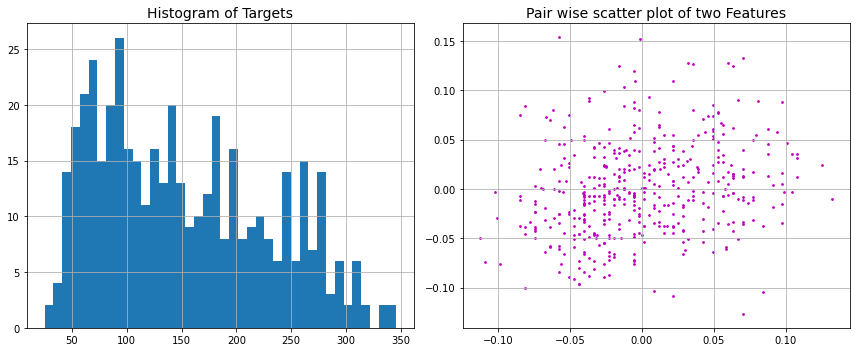

In [10]:
#Linear Least Square Regression
# Load data, inspect and do exploratory plots
#
diabetes = datasets.load_diabetes()
X = diabetes.data
t = diabetes.target
# Inspect sizes
#
NumData, NumFeatures = X.shape
print(NumData, NumFeatures) # 442 X 10
print(t.shape) # 442
# Plot and save
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].hist(t, bins=40)
ax[0].grid(True)
ax[0].set_title("Histogram of Targets", fontsize=14)

ax[1].scatter(X[:,3], X[:,4], c='m', s=3)
ax[1].grid(True)
ax[1].set_title("Pair wise scatter plot of two Features", fontsize=14)

plt.tight_layout()
plt.savefig("DiabetesTargetAndTwoInputs.jpg")

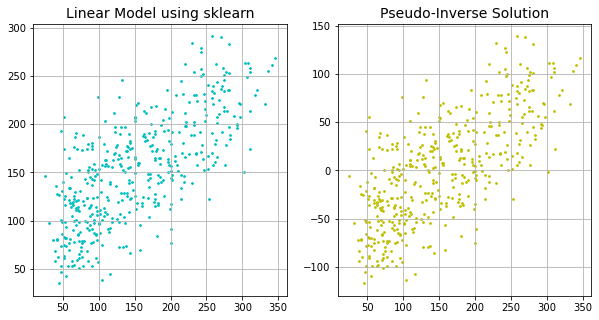

In [36]:
# Linear Least Squares Regression

# Using sklearn
#
lin = LinearRegression()
lin.fit(X, t)
th1 = lin.predict(X)
# Pseudo-inverse solution to linear regression
#
w = np.linalg.inv(X.T @ X) @ X.T @ t
th2 = X @ w
# Plot predictions to check if they look the same!
#

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(t, th1, c='c', s=3)
ax[0].grid(True)
# ax[0].plot(np.linspace(50,350),np.linspace(-20,300))
ax[0].set_title("Linear Model using sklearn", fontsize=14)

ax[1].scatter(t, th2, c='y', s=3)
ax[1].grid(True)
# ax[1].plot(np.linspace(50,350),np.linspace(-100,150))
ax[1].set_title("Pseudo-Inverse Solution", fontsize=14)
plt.savefig("sklearnandPseudoInverseScatter.jpg")

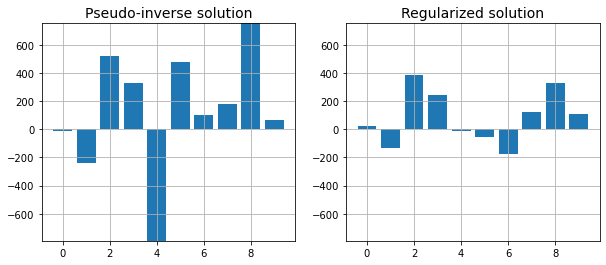

In [38]:
gamma = 0.5
aR = np.linalg.inv(X.T@X+ gamma*np.identity(NumFeatures)) @ X.T @ t
from sklearn.linear_model import Lasso

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].bar(np.arange(len(w)), w)
ax[0].set_title("Pseudo-inverse solution", fontsize=14)
ax[0].grid(True)
ax[0].set_ylim(np.min(w), np.max(w))

ax[1].bar(np.arange(len(aR)), aR)
ax[1].set_title("Regularized solution", fontsize=14)
ax[1].grid(True)
ax[1].set_ylim(np.min(w), np.max(w))
plt.savefig("PseudoInverseAndRegularisedHisto.jpg")

[  0.          -0.         367.70185207   6.30190419   0.
   0.          -0.           0.         307.6057       0.        ]


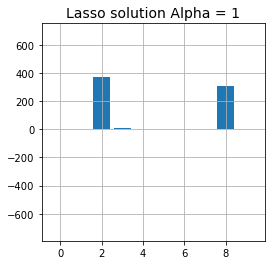

In [49]:
ll = Lasso(alpha=1)
ll.fit(X, t)
yh_lasso = ll.predict(X)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

ax.bar(np.arange(len(ll.coef_)), ll.coef_)
ax.set_title("Lasso solution Alpha = 1", fontsize=14)
ax.grid(True)
ax.set_ylim(np.min(w), np.max(w))

plt.savefig("LassoHisto1.jpg")

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
# Synthetic data:
# Problem taken from Hastie, et al., Statistical Learning with Sparsity
# Z1, Z2 ~ N(0,1)
# Y = 3*Z1 -1.5*Z2 + 10*N(0,1) Noisy response
# Noisy inputs (the six are in two groups of three each)
# Xj= Z1 + 0.2*N(0,1) for j = 1,2,3, and
# Xj= Z2 + 0.2*N(0,1) for j = 4,5,6.
N = 100
y = np.empty(0)
X = np.empty([0,6])
for i in range(N):
    Z1= np.random.randn()
    Z2= np.random.randn()
    y = np.append(y, 3*Z1 - 1.5*Z2 + 2*np.random.randn())
    Xarr = np.array([Z1,Z1,Z1,Z2,Z2,Z2])+ np.random.randn(6)/5
    X = np.vstack ((X, Xarr.tolist()))

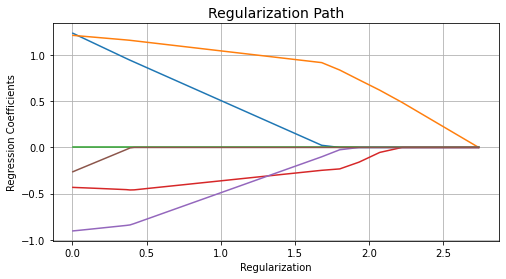

In [59]:
# Compute regressions with Lasso and return paths
#
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, fit_intercept=False)
# Plot each coefficient
#
fig, ax = plt.subplots(figsize = (8,4))
for i in range(6):
    ax.plot(alphas_lasso, coefs_lasso[i,:])
ax.grid(True)
ax.set_xlabel("Regularization")
ax.set_ylabel("Regression Coefficients")
ax.set_title("Regularization Path", fontsize=14)
plt.savefig("RegularizationPath.jpg")

In [9]:
#Regularization

# gamma = 0.5
# wR = np.linalg.inv(X.T @ X + gamma*np.identity(NumFeatures)) @ X.T @ t
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

# ax.bar(np.arange(len(wR)), wR)

(932, 2261)
Index([                             0,          'Compound_Identifier',
                             'Source',                       'SMILES',
                            'LogS.M.',                           'MW',
                                'AMW',                           'Sv',
                                 'Se',                           'Sp',
       ...
                       'Psychotic-80',                 'Psychotic-50',
                       'Hypertens-80',                 'Hypertens-50',
                        'Hypnotic-80',                  'Hypnotic-50',
                      'Neoplastic-80',                'Neoplastic-50',
                       'Infective-80', 'Infective-50_x000D__x000D_\n'],
      dtype='object', length=2261)


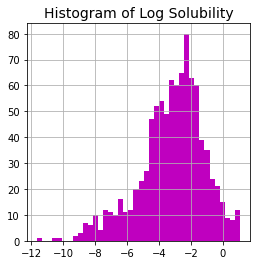

In [61]:
import pandas as pd
sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False).dropna()
print(sol.shape)
colnames = sol.columns
print(colnames)
t = sol["LogS.M."].to_numpy()
X = sol[colnames[5:len(colnames)-1]].to_numpy()
N, p = X.shape

fig, ax = plt.subplots(figsize=(4,4))
ax.hist(t, bins=40, facecolor="m")
ax.set_title("Histogram of Log Solubility", fontsize=14)
ax.grid(True)
plt.savefig("LogSolubilityHisto.jpg")
# X = sol[colnames[5:len(colnames)]]
# N, p = X.shape
# print(X.shape)
# print(t.shape)

C:\Users\Supritha Konaje\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.397860391555, tolerance: 0.26156421734662577
  model = cd_fast.enet_coordinate_descent(


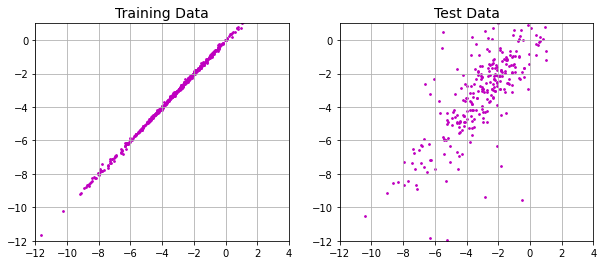

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
# Regularized regression
#
ll2 = Lasso(alpha=0.2)
ll2.fit(X_train, t_train)
lasso_train = ll2.predict(X_train)
lasso_test = ll2.predict(X_test)

gamma = 0.1
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w
th_test = X_test @ w
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c='m', s=3)
ax[0].set_ylim(-12, 1)
ax[0].set_xlim(-12, 4)
ax[0].grid(True)
ax[0].set_title("Training Data", fontsize=14)

ax[1].scatter(t_test, th_test, c='m', s=3)
ax[1].set_ylim(-12, 1)
ax[1].set_xlim(-12, 4)
ax[1].grid(True)
ax[1].set_title("Test Data", fontsize=14)
plt.savefig("TrainingAndTest.jpg")

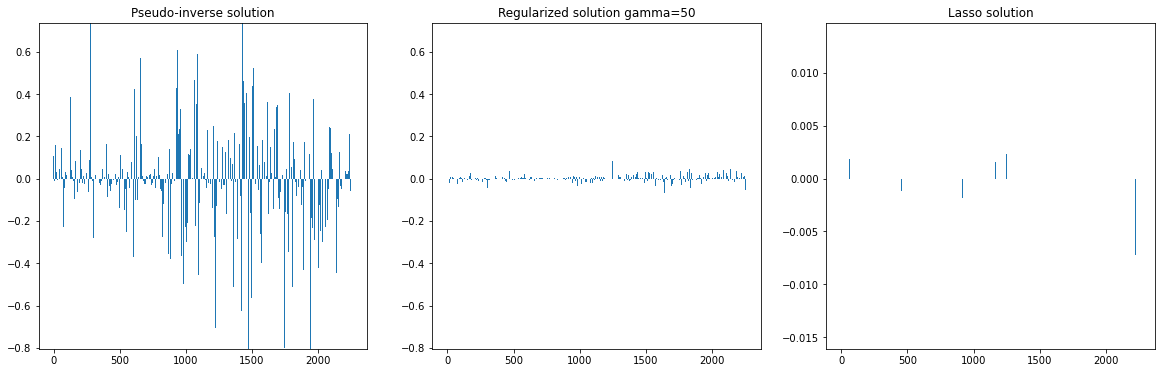

In [72]:
# gamma = 2.3
aR = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
aR2 = np.linalg.inv(X_train.T @ X_train + 50*np.identity(p)) @ X_train.T @ t_train
aNR = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ t_train

fig, ax = plt.subplots(ncols=3, figsize=(20,6))
ax[0].bar(np.arange(len(aNR)), aNR)
ax[0].set_title("Pseudo-inverse solution", fontsize=12)
ax[0].set_ylim(np.min(w), np.max(w))

ax[1].bar(np.arange(len(aR2)), aR2)
ax[1].set_title("Regularized solution gamma=50" , fontsize=12)
ax[1].set_ylim(np.min(w), np.max(w))

ax[2].bar(np.arange(len(ll2.coef_)), ll2.coef_)
ax[2].set_title("Lasso solution", fontsize=12)
ax[2].set_ylim(np.min(w)/50, np.max(w)/50)

plt.savefig("Last.jpg")